In [1]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
import random

In [2]:
def criaDatasetBidimensionalBinário(n=20, slop=[2, 1], intercept=-0.4):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

In [3]:
def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

In [4]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

In [5]:
def sign(a):
  return (a >= 0) * 2 - 1

def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

In [6]:
def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

Perceptron

In [7]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

In [8]:
slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinário(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.1249506 , 0.73040583],
        [0.68627734, 0.2703068 ],
        [0.4395955 , 0.72338795],
        [0.28085647, 0.55868706],
        [0.83694803, 0.90240305],
        [0.47335732, 0.18591229],
        [0.7335822 , 0.62633044],
        [0.86213628, 0.87878556],
        [0.50073485, 0.91246084],
        [0.5693833 , 0.5615552 ],
        [0.98664556, 0.02623239],
        [0.93321272, 0.46486802],
        [0.03125363, 0.52213201],
        [0.90611967, 0.61552966],
        [0.86836097, 0.25813262],
        [0.10697306, 0.76610528],
        [0.2716469 , 0.33765438],
        [0.16489066, 0.39862098],
        [0.92711362, 0.98872129],
        [0.04771125, 0.89519095]]),
 array([-1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        -1,  1, -1]))

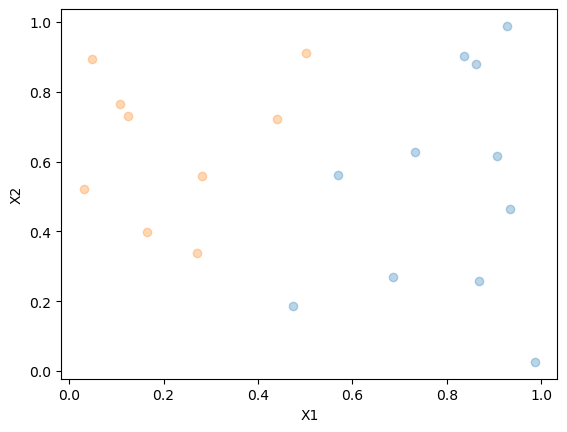

In [9]:
plotaDatasetBidimensional(Xtr, ytr)

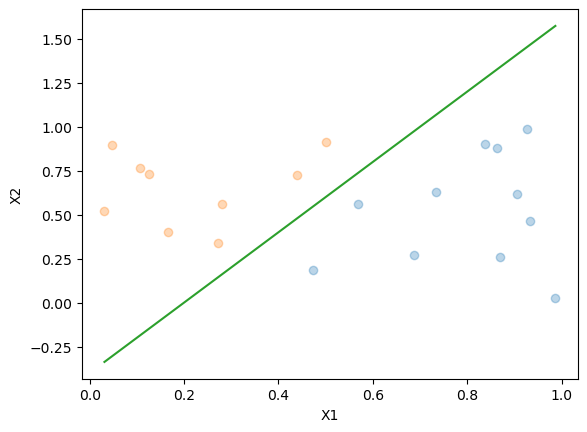

In [10]:
plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

1.0
[-4.61146445 21.79403487 -8.26978783]


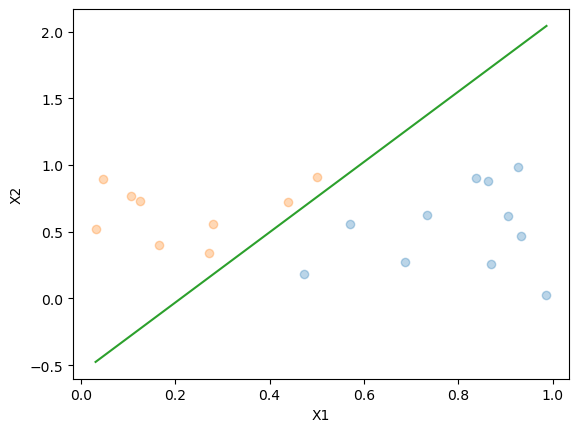

In [11]:
perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])

0.954


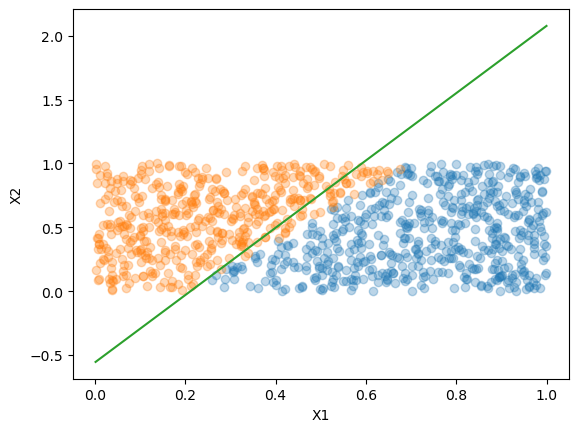

In [12]:
Xte, yte = criaDatasetBidimensionalBinário(1000)
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
     

Perceptron vs LinearSVC

In [26]:
# Bibliotecas usadas para comparação

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [27]:
# Carregar MNIST dataset

digits = load_digits()

In [38]:
# Dividir o dataset em Treino e Teste (25%)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [42]:
# Treino do Perceptron

perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, y_train)

In [43]:
# Treino do LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [44]:
# Performance dos Algoritmos

print("Acuracia do Perceptron:", perceptron.score(X_test, y_test))
print("Acuracia do LinearSVC:", linear_svc.score(X_test, y_test))

Acuracia do Perceptron: 0.08888888888888889
Acuracia do LinearSVC: 0.9422222222222222
